In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
%matplotlib inline

In [2]:
def NormalDist(sigma,mean,x):
    p=1/np.sqrt(2*np.pi*sigma**2)*np.e(-(x-mean)^2/(2*sigma**2))
    return p
DT=lambda KT,e,u:(KT/e)*u

K=8.617333262e-5 #ev/K

#for Liquid
E_velLiq=164800 # cm/s
DiffusionTLiq=DT(K*87,1,(E_velLiq/500)) #cm^2*s-1*V-1


#for Gas
E_velGas=260000 #cm/s 
DiffusionTGas=DT(K*300,1,(E_velGas/500))




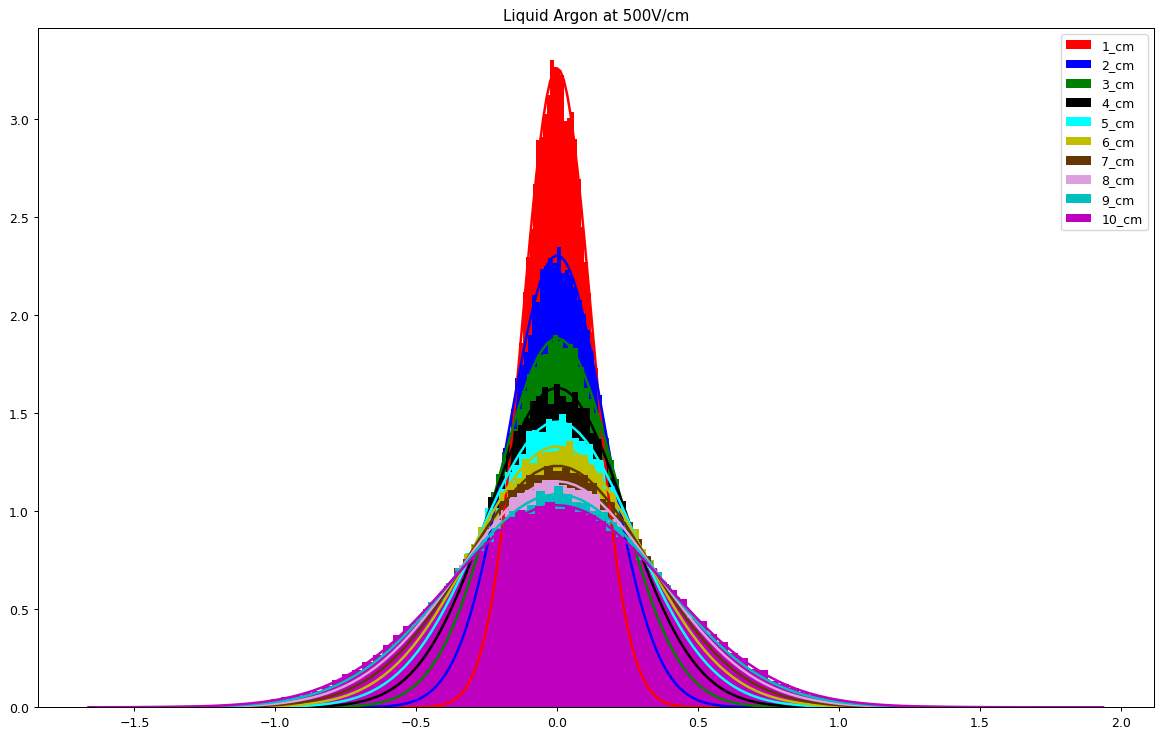

In [3]:
mean=0
eloc = np.arange(1,11,1)
Distro={}

for x in eloc:
    T_drift = x/ E_velLiq;
    sigma=np.sqrt(2*500*DiffusionTLiq*T_drift)
    s=np.random.normal(mean,sigma,100000)
    Distro[x]=s
clrs=['r','b','g','k','#00FFFF','y','#653700','#DDA0DD','c','m']
lbl=[]
for x in eloc:
    lbl.append(str(x)+"_cm")
figure(figsize=(16, 10), dpi=90)
LigX=[]
#print ("For Liq")
for x in eloc:
    T_drift = x/ E_velLiq;
    sigma=np.sqrt(2*500*DiffusionTLiq*T_drift)
    LigX.append(max(Distro[x]))
    #print(f" Distance X = {x} , Max= {max(np.round(Distro[x],3))}")
    count, bins, ignored = plt.hist(Distro[x], 100, density=True,color=clrs[x-1],label=lbl[x-1])
    plt.plot(bins,(1/(sigma * np.sqrt(2 * np.pi))*np.exp( - (bins - mean)**2 / (2 * sigma**2) )),linewidth=2,color=clrs[x-1])
    plt.legend()
plt.title("Liquid Argon at 500V/cm")
plt.xlabel('')
plt.ylabel('')

plt.show()

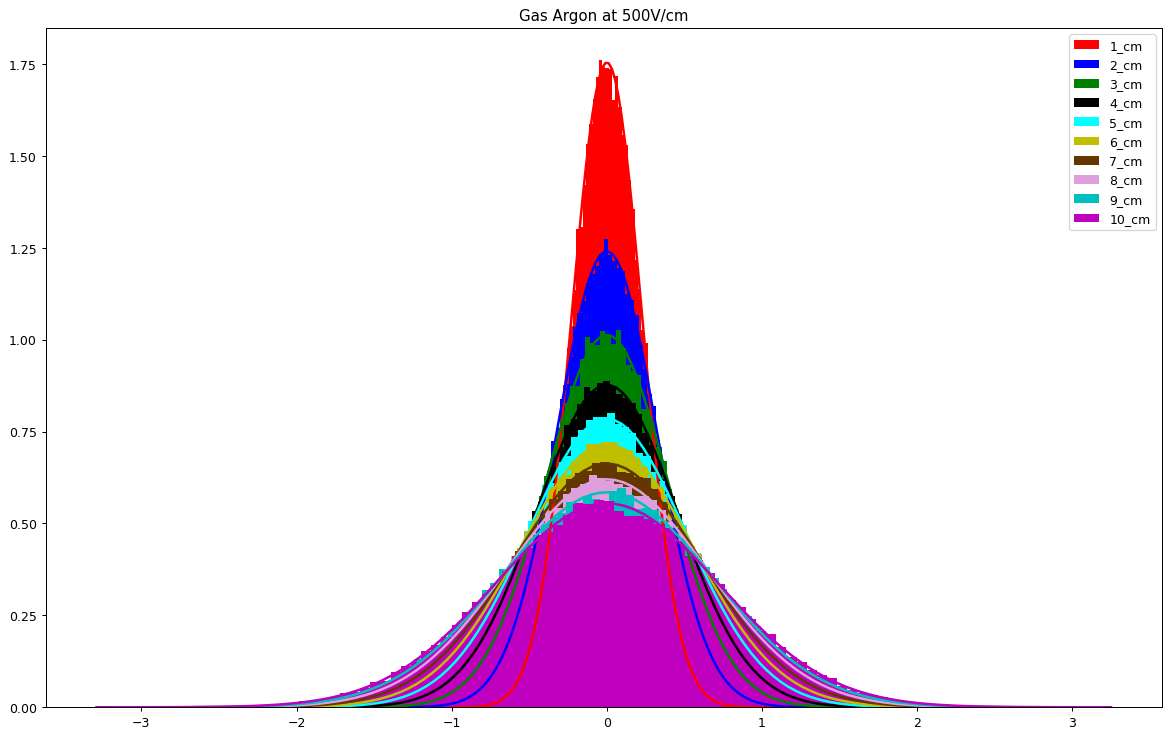

In [4]:
mean=0
eloc = np.arange(1,11,1)
Distro={}
GasX=[]


for x in eloc:
    T_drift = x/ E_velGas;
    sigma=np.sqrt(2*500*DiffusionTGas*T_drift)
    s=np.random.normal(mean,sigma,100000)
    Distro[x]=s


clrs=['r','b','g','k','#00FFFF','y','#653700','#DDA0DD','c','m']
lbl=[]
for x in eloc:
    lbl.append(str(x)+"_cm")
figure(figsize=(16, 10), dpi=90)

for x in eloc:
    T_drift = x/ E_velGas;
    sigma=np.sqrt(2*500*DiffusionTGas*T_drift)
    count, bins, ignored = plt.hist(Distro[x], 100, density=True,color=clrs[x-1],label=lbl[x-1])
    GasX.append(max(Distro[x]))
    #print(f" Distance X = {x} , Max= {max(np.round(Distro[x],3))}")
    plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi))*np.exp( - (bins - mean)**2 / (2 * sigma**2) ),linewidth=2,color=clrs[x-1])
    plt.legend()
    
plt.title("Gas Argon at 500V/cm")
plt.xlabel('')
plt.ylabel('')

plt.show()




In [5]:

GasX=np.array(GasX)
LigX=np.array(LigX)

SensorRadiusInGas=np.round(np.sqrt(GasX**2+GasX**2),1)
SensorRadiusInLiq=np.round(np.sqrt(LigX**2+LigX**2),1)

[1.6 2.  2.3 3.1 3.6 3.3 3.6 4.  3.9 4.6]


(-5.0, 5.0)

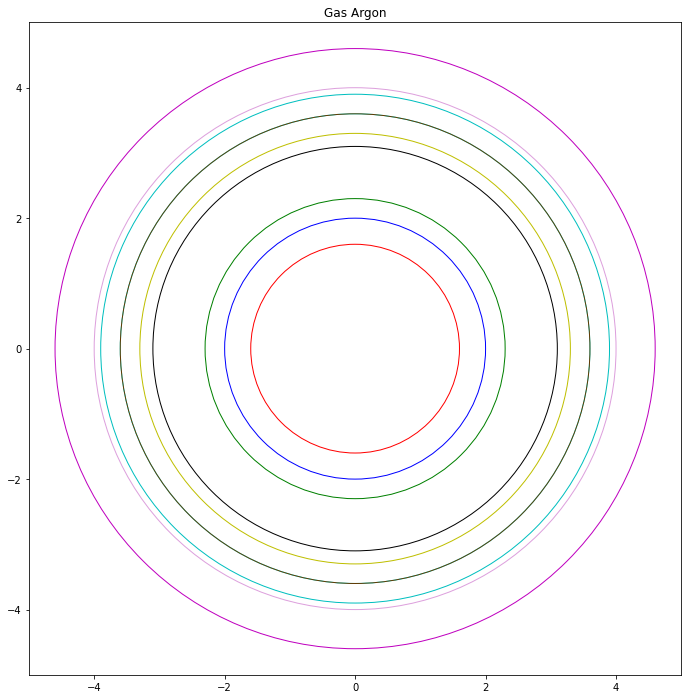

In [6]:
import matplotlib.pyplot as plt

clrs=['r','b','g','k','#00FFFF','y','#653700','#DDA0DD','c','m']
lbl=[]
for x in eloc:
    lbl.append(str(x)+"_cm")
print(SensorRadiusInGas)

fig,ax = plt.subplots(1)
ax.set_aspect('equal')
fig = plt.gcf()
fig.set_size_inches(20, 12)
for x in range(0,len(SensorRadiusInGas)):
    ax.add_patch(plt.Circle((0, 0), SensorRadiusInGas[x], color=clrs[x],fill=False,label=lbl[x]))

plt.title("Gas Argon")


plt.xlim(-5,5)
plt.ylim(-5,5)


(-3.0, 3.0)

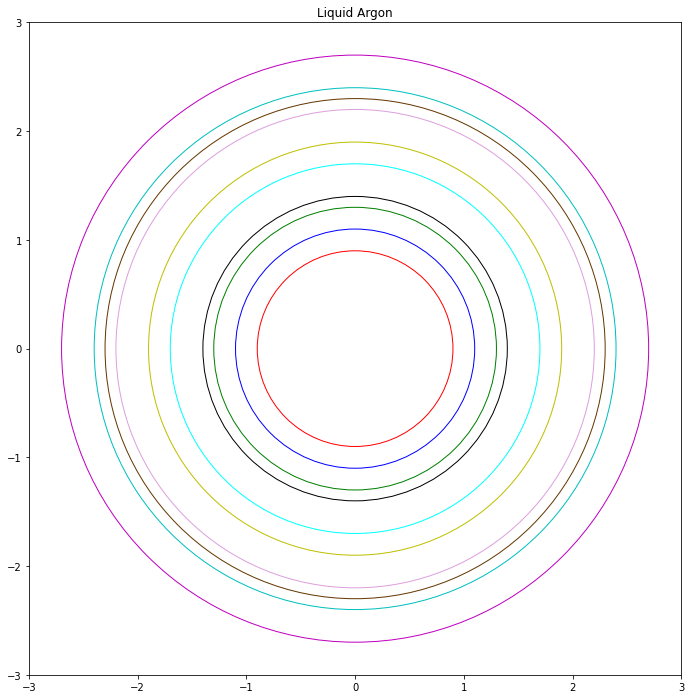

In [7]:
clrs=['r','b','g','k','#00FFFF','y','#653700','#DDA0DD','c','m']
lbl=[]
for x in eloc:
    lbl.append(str(x)+"_cm")

fig,ax = plt.subplots(1)
ax.set_aspect('equal')
fig = plt.gcf()
fig.set_size_inches(20, 12)
for x in range(0,len(SensorRadiusInLiq)):
    ax.add_patch(plt.Circle((0, 0), SensorRadiusInLiq[x], color=clrs[x],fill=False,label=lbl[x]))

plt.title("Liquid Argon")


plt.xlim(-3,3)
plt.ylim(-3,3)